## Модель прогнозирования оттока сотрудников

HR-аналитика - одна из областей, где машинное обучение может помочь компании оптимизировать работу. Среди перспективных направлений особенно выделяется задача прогнозирования ухода сотрудника, т.к. недоукомплектованный штат сотрудников порождает сложности в бизнес-процессах и может принести компании существенные убытки. 

Любого нового сотрудника в компании нужно:
- найти;
- обучить и адаптировать к работе;
- передать дела от ушедшего сотрудника.

Каждый из этапов требует:
- человеческих ресурсов для поиска, найма, обучения и адаптации новых сотрудников;
- временных ресурсов.

Прогнозирование оттока позволяет предотвратить уход сотрудника, т.к. работодатель заранее понимает истощенность сотрудника и может направить ресурсы на восстановление и укрепление отношений с сотрудником. 

В этом проекте мы научимся прогнозировать отток сотрудников на данных, подготовленных компанией IBM.<br>
Целевая переменная, которую мы прогнозируем - Attrition, истощение сотрудника. Истощенность сотрудника - идентификатор его ухода

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Образец https://www.datacamp.com/projects/558

## 1. Баланс классов

### Задача

Ни один проект нельзя начать, пока не подгружены данные и не визуально не проинспектированы на корректное чтение. 
- Импортируйте библиотеку pandas
- Считайте файл 'HR-Employee-Attrition.csv' с помощью метода read_csv()
- Посмотрите на первые 5 наблюдений в датасете методом head()

In [2]:
# Импортируте библиотеку pandas
import pandas as pd

# Считайте файл HR-Employee-Attrition.csv
data = pd.read_csv('HR-Employee-Attrition.csv')

# Посмотрите на первые 5 записей
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Задача

В этом курсе мы много обсуждали задачу классификации и несбалансированности классов. <br> 
Изучение данных начнем с целевой переменной  Attrition и проверим, есть ли дисбаланс классов. 

- Используя метод value_counts() посчитайте частоту появления классов и сохраните частотную таблицу в переменную class_frequency
- Визуализируйте таблицу class_frequency методом plot(kind='bar'), чтобы увидеть дисбаланс классов

In [3]:
# Посчитайте распределение по классам
class_frequency = data['Attrition'].value_counts()

# Нарисуйте barplot для визуальной проверки баланса классов
class_frequency.plot(kind='bar')

### Задача

Налицо несбалансированность классов. Используйте метод subsampling для балансировки классов. 
- Выделите в отдельный датафрейм attrition_yes данные с сотрудниками, которые покинули компанию, по условию: <br> data['Attrition'] == 'Yes'
- Посчитайте количество наблюдений в этом классе и сохраните в переменную size_yes. Для этого вам нужно взять первое значение из поля shape датафрейма attrition_yes
- Создайте датафрейм attrition_no одного размера с attrition_yes, используя метод sample
- Объедините датафреймы attrition_no и attrition_yes в один методом pd.concat, записав один датафрейм за другим
- Методом reset_index() сбросьте индексы объединенного датафрейма
- Создайте столбцовую диаграмму, показывающую баланс классов: методом value_counts() посчитайте частоту классов, а затем к частотной таблице примените метод plot(kind='bar')


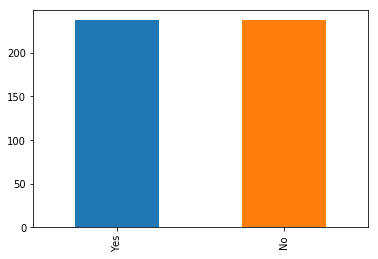

In [4]:
# Выделите в отдельный датафрейм attrition_yes данные с сотрудниками, которые истощены
attrition_yes = data[data['Attrition'] == 'Yes']

# Посчитайте количество наблюдений в этом классе.
size_yes = attrition_yes.shape[0]

# Создайте датафрейм attrition_no одного размера с attrition_yes
attrition_no = data[data['Attrition'] == 'No'].sample(size_yes)

# Объедините датафреймы attrition_no и attrition_yes в один
data = pd.concat([attrition_yes, attrition_no], axis=0)

# Сбросьте индексы объединенного датафрейма
data = data.reset_index(drop=True)

# Создайте столбцовую диаграмму, показывающую баланс классов
data['Attrition'].value_counts().plot(kind='bar')

## 2. Категориальные признаки

Теперь можно приступить к изучению данных. В датасете есть X признаков. <br> 
Сколько из них числовых? Сколько из них категориальных?<br> 
Сколько из них категориальных, которые маскируются под числовые?<br> 

### Задача

- Создайте датафрейм types, в котором записана информация о колонка и типах данных. Используйте метод pd.DataFrame, в качестве аргумента передайте поле dtypes
- Соберите список категориальных переменных var_cat: по условию types[0] == 'object' найдите названия колонок с категориальными переменными


In [5]:
# Создайте датафрейм types, в котором записана информация о колонка и типах данных
types = pd.DataFrame(data.dtypes)
types
# Соберите список категориальных переменных
var_cat = list(types[types[0] == 'object'].index)

Не все переменные, которые категориальные, могут быть считаны программой как категориальые. Например, различные уровни образования могут быть зашифрованы цифрами: 1 - Высшее, 2 - Среднее специальное, 3 - Среднее общее. Являются ли в таком случае 1, 2, 3 цифрами? Нет, это имена категорий. Поэтому мы проверим, нет ли таких обозначений в датафрейме.  

- Найдите количество уникальных записей в каждом из столбцов. Используйте лямбда-функцию, которая считает длину колонки через функции len() и метод drop_duplicates(). Написанная лямбда-функция распространяется на все колонки методом agg с параметром axis=0
- Отсортируйте получившуюся таблицу и обратите ее в датафрейм методом sort_values() и функцией pd.DataFrame()
- Удалите из нее записи тех переменных, которые попали в var_cat. Воспользуйтесь методом isin(var_cat), а затем возьмите отрицание, чтобы найти строки, которых нет в var_cat
- Проинспектируйте визуально, все ли признаки действительно числовые


In [6]:
# Найдите количество уникальных записей в каждом из столбцов
unique_val = data.agg(lambda x: len(x.drop_duplicates()), axis=0)
# Отсортируйте получившуюся таблицу и обратите ее в датафрейм
unique_val = pd.DataFrame(unique_val.sort_values())
# Удалите из нее записи тех переменных, которые попали в var_cat
unique_val = unique_val[~unique_val.isin(var_cat)]
# Проинспектируйте визуально, все ли признаки действительно числовые
unique_val

,0
Over18,1
StandardHours,1
EmployeeCount,1
Gender,2
Attrition,2
PerformanceRating,2
OverTime,2
MaritalStatus,3
Department,3
BusinessTravel,3


### Задача

- Over18, StandardHours, EmployeeCount не являются информативными признаками совсем, т.к. в этих столбцах одна и та же запись, их нужно удалить из датафрейма. Соберите их в лист var_non_informative

- Числовыми столбцами являются: *Age, DailyRate, DistanceFromHome, EmployeeNumber, HourlyRate, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike , TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion*. Соберите их в список var_num


- Остальные признаки - категориальные. Соберите их в переменную var_cat. 

In [7]:
# Сохраните в отдельный список неинформативные признаки
var_non_informative = ['EmployeeCount', 'Over18', 'StandardHours', 'Attrition']

# Соберите в один список все числовые переменные
var_num = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 
            'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike' , 'TotalWorkingYears', 'YearsAtCompany', 
            'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Соберите в список категориальные переменные
var_cat = list(set(data.columns) - set(var_num))

# Посчитайте соотношение категориальных признаков к числовым
k = len(var_cat) / len(var_num)
print(f"Соотношение категориальных признаков к числовым = {k}")

Соотношение категориальных признаков к числовым = 1.5


## 3. Предобработка данных

- Мы выяснили, что EmployeeCount, Over18, StandardHours следует выкинуть, также следует выкинуть признак EmployeeID, так как он не несет никакой важной информации, только ID работника. <br>
- Выделим целевую переменную и удалим из основного датасета

### Задача

In [8]:
# Выделите столбец с целевой переменной в отдельную переменную 
y = data['Attrition']
# Переобозначьте категории  Yes и No в 1 и 0 соответственно
y = y.map({'Yes':1, 'No':0})
# Удалите из датафрейма неинформативные признаки
data = data.drop(var_non_informative + ['Attrition'], axis=1)       
# Обновите var_cat и var_num
var_cat = list(set(var_cat) - set(['EmployeeCount', 'Over18', 'StandardHours', 'Attrition']))
var_num = list(set(var_num) - {"EmployeeID"})

### Задача

In [9]:
# проверьте данные на пропуски
data.isna().sum(axis=0)

# замените пропуски в колонках NumCompaniesWorked, TotalWorkingYears на медианное значение
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].fillna(value=data['NumCompaniesWorked'].median())
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna(value=data['TotalWorkingYears'].median())

### Задача

In [10]:
# проведите OHE для категориальных переменных 
data = pd.get_dummies(data, drop_first=True, columns=var_cat)

### Задача 

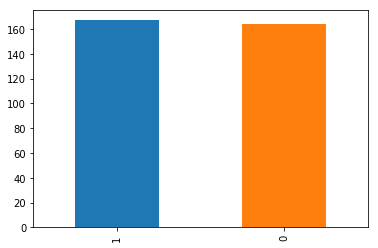

In [11]:
# Импортируйте функцию train_test_split
from sklearn.model_selection import train_test_split

# Разделите данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

# Проверьте баланс классов
y_train.value_counts().plot(kind='bar')
y_test.value_counts().plot(kind='bar')

### Задача 

In [12]:
# Импортируйте шкалировщик
from sklearn.preprocessing import StandardScaler
# Обучите шкалировщик на данных
scaler = StandardScaler()
scaler.fit(X_train[var_num])
# Отшкалируйте тестовые и тренировочные данные
X_train[var_num] = scaler.transform(X_train[var_num])
X_test[var_num] = scaler.transform(X_test[var_num])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

## 4. Обучение base-line модели

### Задача 

In [13]:
# импортируйте KNN
from sklearn.neighbors import KNeighborsClassifier

# Объявите модель
knn = KNeighborsClassifier()

# Обучите
knn.fit(X_train, y_train)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_knn_proba = knn.predict_proba(X_test)[:,1]
# Спрогнозируйте класс
y_pred_knn_class = knn.predict(X_test)

# импортируйте метрики качества
from sklearn.metrics import roc_auc_score, f1_score
# Посчитайте метрики качества ROC_AUC и F1
print('ROC_AUC = ', roc_auc_score(y_test, y_pred_knn_proba))
print('f1_score = ', f1_score(y_test, y_pred_knn_class))

ROC_AUC =  0.7147749510763209
f1_score =  0.6474820143884891


## 5. Обучение альтернативных алгоритмов

In [14]:
# импортируйте LogisticRegression
from sklearn.linear_model import LogisticRegression
# Объявите модель
log_reg = LogisticRegression(random_state=42)
# Обучите
log_reg.fit(X_train, y_train)
# спрогнозируйте вероятность к истощению
y_pred_logreg_proba = log_reg.predict_proba(X_test)[:,1] 

# спрогнозируйте принадлежит ли человек к группе истощенных
y_pred_logreg_class = log_reg.predict(X_test)

# Посчитайте метрики качества ROC_AUC и F1
print('ROC_AUC = ', roc_auc_score(y_test, y_pred_logreg_proba))
print('f1_score = ', f1_score(y_test, y_pred_logreg_class))

ROC_AUC =  0.7796477495107632
f1_score =  0.7066666666666667


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Задача 

In [15]:
# импортируйте Random Forest
from sklearn.ensemble import RandomForestClassifier

# Обучите
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

# Спрогнозируйте
pred_rfc_proba = rfc.predict_proba(X_test)[:,1]
pred_rfc_class = rfc.predict(X_test)

print('ROC_AUC = ', roc_auc_score(y_test, pred_rfc_proba))
print('f1_score = ', f1_score(y_test, pred_rfc_class))

ROC_AUC =  0.6743639921722113
f1_score =  0.5454545454545454


## 6. Валидация логистической регрессии

### Задача 

In [16]:
# импортируйте cross_val_score
from sklearn.model_selection import cross_val_score

# объявите модель для валидации
log_reg_cv = LogisticRegression(random_state=42)

# валидируйте модель
roc_auc_val = cross_val_score(log_reg_cv, X_train, y_train, cv=5, scoring='roc_auc')
# 
print(roc_auc_val)

# импортируйте библиотеку numpy
import numpy as np

# получите среднюю оценку качества модели
print(np.mean(roc_auc_val))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.87344029 0.81283422 0.82277319 0.80532599 0.79356061]
0.8215868578836494


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 7. Тюнинг и валидация случайного леса

### Задача 

In [17]:
# Импортируйте GridSearchCV
from sklearn.model_selection import GridSearchCV

# Объявите модель
rfc = RandomForestClassifier(random_state=42)

# Задайте параметры
params = {
    'n_estimators': [10, 100, 200],
    'max_depth': [5, 10, 20],
}

# Обучите решетку
gcv = GridSearchCV(rfc, params, cv=4, scoring='roc_auc', n_jobs=4)
gcv.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [10, 100, 200], 'max_depth': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### Задача 

In [18]:
# Найдите лучшее значение метрики
print('bestCV ROC_AUC = ', gcv.best_score_)
# Найдите лучшее сочетание параметров
print('best params =', gcv.best_params_)

# Объявите лучшую модель
best_model = gcv.best_estimator_

# Обучите ее
best_model.fit(X_train, y_train)

# Сделайте прогнозы
pred_proba = best_model.predict_proba(X_test)[:,1]
pred_class = best_model.predict(X_test)

# проверьте метрики качества
print('ROC_AUC = ', roc_auc_score(y_test, pred_proba))
print('f1_score = ', f1_score(y_test, pred_class))

bestCV ROC_AUC =  0.7794649655603159
best params = {'max_depth': 20, 'n_estimators': 200}
ROC_AUC =  0.7336594911937379
f1_score =  0.6323529411764707


## 8. Выводы